In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn



In [7]:
dtype_dict = {0: 'str', 2: 'str'}

casualty = pd.read_csv('data/dft-road-casualty-statistics-casualty-2023.csv', dtype=dtype_dict)

In [8]:
casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      132977 non-null  object
 1   accident_year                       132977 non-null  int64 
 2   accident_reference                  132977 non-null  object
 3   vehicle_reference                   132977 non-null  int64 
 4   casualty_reference                  132977 non-null  int64 
 5   casualty_class                      132977 non-null  int64 
 6   sex_of_casualty                     132977 non-null  int64 
 7   age_of_casualty                     132977 non-null  int64 
 8   age_band_of_casualty                132977 non-null  int64 
 9   casualty_severity                   132977 non-null  int64 
 10  pedestrian_location                 132977 non-null  int64 
 11  pedestrian_movement                 132

In [9]:
casualty.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,enhanced_casualty_severity,casualty_distance_banding
0,2.02E+12,2023,10419171,1,1,3,2,20,4,3,...,1,0,0,0,0,1,10,E01030370,-1,3
1,2.02E+12,2023,10419183,2,1,1,1,25,5,3,...,0,0,0,0,9,1,3,E01001546,-1,1
2,2.02E+12,2023,10419183,3,2,2,2,38,7,3,...,0,2,0,0,9,-1,-1,-1,-1,-1
3,2.02E+12,2023,10419189,1,1,1,1,50,8,3,...,0,0,0,0,9,1,5,E01002443,-1,1
4,2.02E+12,2023,10419191,2,1,1,1,34,6,3,...,0,0,0,0,1,1,2,E01004679,-1,2


In [10]:
#create mask and remove LSOA with -1 
mask = casualty['lsoa_of_casualty'] == '-1'
casualty = casualty[~mask]
casualty.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,enhanced_casualty_severity,casualty_distance_banding
0,2.02E+12,2023,10419171,1,1,3,2,20,4,3,...,1,0,0,0,0,1,10,E01030370,-1,3
1,2.02E+12,2023,10419183,2,1,1,1,25,5,3,...,0,0,0,0,9,1,3,E01001546,-1,1
3,2.02E+12,2023,10419189,1,1,1,1,50,8,3,...,0,0,0,0,9,1,5,E01002443,-1,1
4,2.02E+12,2023,10419191,2,1,1,1,34,6,3,...,0,0,0,0,1,1,2,E01004679,-1,2
6,2.02E+12,2023,10419198,1,1,3,1,65,9,3,...,4,0,0,0,0,1,5,E01023593,-1,4


In [12]:
lsoa = pd.read_csv('data/lsoa_name.csv')
lsoa.head()
lsoa_list = lsoa.values.tolist()
print(lsoa_list[:10]) #but this is generate a list of lists 

import itertools

lsoa_list = list(itertools.chain.from_iterable(lsoa_list))
print(lsoa_list[:10])

[['E01000907'], ['E01000908'], ['E01000909'], ['E01000912'], ['E01000913'], ['E01000893'], ['E01000894'], ['E01000895'], ['E01000896'], ['E01000899']]
['E01000907', 'E01000908', 'E01000909', 'E01000912', 'E01000913', 'E01000893', 'E01000894', 'E01000895', 'E01000896', 'E01000899']


In [13]:
#filter based on lSOA list now 

In [14]:
filtered_casualty = casualty[casualty['lsoa_of_casualty'].isin(lsoa_list)]
#23841 data points 
print(filtered_casualty.columns)
print(filtered_casualty.columns.nlevels)

severity = filtered_casualty[['casualty_severity','lsoa_of_casualty']]
severity


counts = severity['lsoa_of_casualty'].value_counts()
count_unique = severity.drop_duplicates(subset='lsoa_of_casualty').copy()
count_unique['count'] = severity['lsoa_of_casualty'].map(counts)
count_unique #only count; not looking at severity 

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty',
       'enhanced_casualty_severity', 'casualty_distance_banding'],
      dtype='object')
1


,casualty_severity,lsoa_of_casualty,count
1,3,E01001546,6
3,3,E01002443,9
4,3,E01004679,7
8,3,E01003629,6
9,3,E01000989,5
...,...,...,...
111570,3,E01000346,2
115204,2,E01004351,1
115498,2,E01004730,1
118566,3,E01000136,1


In [5]:
#read age data and do some data wrangling to get proportion of 3 broad age band 
age = pd.read_csv("data/age.csv")
age['2021 super output area - lower layer'] = age['2021 super output area - lower layer'].str[:9]
filtered_age = age[age['2021 super output area - lower layer'].isin(lsoa_list)]
filtered_age = filtered_age.copy()
filtered_age.loc[:, 'young'] = filtered_age.iloc[:, 2:6].sum(axis=1)
filtered_age.loc[:, 'middle'] = filtered_age.iloc[:, 6:9].sum(axis=1)
filtered_age.loc[:, 'old'] = filtered_age.iloc[:, 9:13].sum(axis=1)
filtered_age['young_prop'] = filtered_age['young'] / filtered_age['Total']
filtered_age['middle_prop'] = filtered_age['middle'] / filtered_age['Total']
filtered_age['old_prop'] = filtered_age['old'] / filtered_age['Total']
filtered_age['oldyoung'] = (filtered_age['old'] + filtered_age['young'] ) / filtered_age['Total']
filtered_age

FileNotFoundError: [Errno 2] No such file or directory: 'data/age.csv'

In [15]:
#left join 
columns_to_drop = filtered_age.columns[1:19]
df_dropped = filtered_age.drop(columns=columns_to_drop)
df_dropped

df_dropped['lsoa_of_casualty'] = df_dropped['2021 super output area - lower layer']
result = pd.merge(count_unique, df_dropped, on='lsoa_of_casualty', how='left')
result_dropped = result.dropna(subset=['oldyoung'])
result_dropped

NameError: name 'filtered_age' is not defined

In [16]:
#simple linear regression model 

import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='count ~ oldyoung', data=result_dropped).fit()

# print the coefficients
lm.pvalues


NameError: name 'result_dropped' is not defined

In [17]:
lm.conf_int(alpha=0.05)

NameError: name 'lm' is not defined

In [18]:
#simple linear regression model 

import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='count ~ oldyoung', data=result_dropped).fit()

# print the coefficients
lm.pvalues

NameError: name 'result_dropped' is not defined

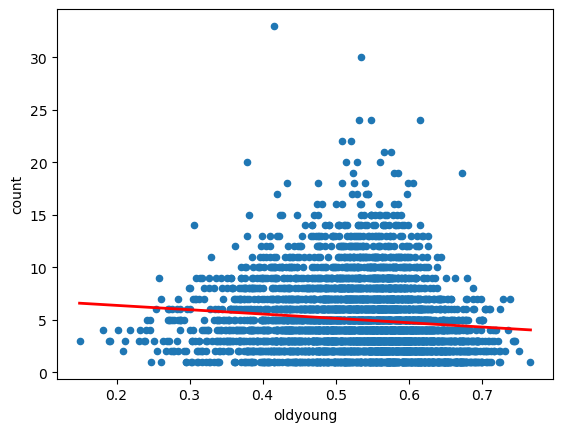

In [19]:
# create a DataFrame with the minimum and maximum values of oldyoung
X_new = pd.DataFrame({'oldyoung': [result_dropped.oldyoung.min(), result_dropped.oldyoung.max()]})
X_new.head()

preds = lm.predict(X_new)
preds

result_dropped.plot(kind='scatter', x='oldyoung', y='count')
plt.plot(X_new, preds, c='red', linewidth=2)

null hypothesis: There is no relationship between old/young proportion and accident count (and thus \(\beta_1\) equals zero)
alternative hypothesis: There is a relationship between old/young proportion and accident count (and thus \(\beta_1\) is not equal to zero)

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for Old/young is far less than 0.05, and so we **believe** that there is a relationship between old/young and accidient count.

Note that we generally ignore the p-value for the intercept.

In [20]:
lm.rsquared

0.012056741189945264

Multiple Regression Calculation 

In [19]:
age2 = filtered_age

columns_to_drop = age2.columns[1:13]
df_dropped = filtered_age.drop(columns=columns_to_drop)
df_dropped

df_dropped['lsoa_of_casualty'] = df_dropped['2021 super output area - lower layer']
result = pd.merge(count_unique, df_dropped, on='lsoa_of_casualty', how='left')
result_dropped2 = result.dropna(subset=['oldyoung'])
result_dropped2

NameError: name 'filtered_age' is not defined

In [154]:
lm = smf.ols(formula='count ~ young_prop + old_prop', data=result_dropped2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     211.9
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.16e-88
Time:                        23:08:03   Log-Likelihood:                -11494.
No. Observations:                4508   AIC:                         2.299e+04
Df Residuals:                    4505   BIC:                         2.301e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7224      0.300     19.084      0.000       5.135       6.310
young_prop     9.5737      0.895     10.697      0.000       7.819      11.328
old_prop      -9.9396      0.616    -16.146      0.000     -11.146      -8.733
==============================================================================
Omnibus:                     1411.386   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6034.900
Skew:                           1.475   Prob(JB):                         0.00
Kurtosis:                       7.840   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Add Car Availability 

In [20]:
car = pd.read_csv("data/car.csv")
car.dropna(subset=['2021 super output area - lower layer'], inplace=True)
car['2021 super output area - lower layer'] = car['2021 super output area - lower layer'].str[:9]
car = car[car['2021 super output area - lower layer'].isin(lsoa_list)]
car['lsoa_of_casualty'] = car['2021 super output area - lower layer']

result2 = pd.merge(result_dropped2, car, on='lsoa_of_casualty', how='left')
result2['nocar'] = result2['No cars or vans in household']
result2

NameError: name 'result_dropped2' is not defined

In [24]:
lm = smf.ols(formula='count ~ young_prop + old_prop + nocar', data=result2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          6.23e-101
Time:                        18:15:14   Log-Likelihood:                -11463.
No. Observations:                4508   AIC:                         2.293e+04
Df Residuals:                    4504   BIC:                         2.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0305      0.553      3.669      0.000       0.946       3.115
young_prop    13.8213      1.038     13.311      0.000      11.786      15.857
old_prop      -4.8684      0.886     -5.498      0.000      -6.604      -3.132
nocar          0.0297      0.004      7.916      0.000       0.022       0.037
==============================================================================
Omnibus:                     1369.008   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5760.681
Skew:                           1.433   Prob(JB):                         0.00
Kurtosis:                       7.739   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Large multiple variable regression - deprivation, old/young proportion, no car proportion, economic status activity, population density, ptal

Testing these variables and using VIF to test for multicollinearity 

In [ ]:
car = pd.read_csv("data/car.csv")
car.dropna(subset=['2021 super output area - lower layer'], inplace=True)
car['2021 super output area - lower layer'] = car['2021 super output area - lower layer'].str[:9]
car = car[car['2021 super output area - lower layer'].isin(lsoa_list)]
car['lsoa_of_casualty'] = car['2021 super output area - lower layer']

deprivation = pd.read_csv("data/deprivation.csv")
pop = pd.read_csv("data/population_density.csv")
econ = pd.read_csv("data/economic activity status.csv")
ptal = pd.read_csv("data/ptal2.csv")

dataframes = [deprivation, pop, econ]

# Loop through each dataframe
for i, item in enumerate(dataframes):
    item.dropna(subset=['lsoa'], inplace=True)   # Drop rows with NaN in 'lsoa'
    item['lsoa'] = item['lsoa'].str[:9]  # Truncate 'lsoa' to first 9 characters
    item = item[item['lsoa'].isin(lsoa_list)] 
    print(f"After filtering: {item.shape[0]} rows")

deprivation = deprivation[deprivation['lsoa'].isin(lsoa_list)] 
pop = pop[pop['lsoa'].isin(lsoa_list)] 
econ = econ[econ['lsoa'].isin(lsoa_list)] 
ptal = ptal[ptal['lsoa'].isin(lsoa_list)] 

print(f"Final shape of deprivation: {deprivation.shape}")
print(f"Final shape of pop: {pop.shape}")
print(f"Final shape of econ: {econ.shape}")
print(f"Final shape of econ: {ptal.shape}")



result2 = result2.rename(columns={'lsoa_of_casualty': 'lsoa'})
result2 = pd.merge(result2, deprivation, on='lsoa', how='left')
result2 = pd.merge(result2, pop, on='lsoa', how='left')
result2 = pd.merge(result2, econ, on='lsoa', how='left')
result2 = pd.merge(result2, ptal, on='lsoa', how='left')
result2 = result2.rename(columns={'2021': 'popden'})


After filtering: 4659 rows
After filtering: 4659 rows
After filtering: 4659 rows
Final shape of deprivation: (4659, 6)
Final shape of pop: (4659, 2)
Final shape of econ: (4659, 5)
Final shape of econ: (4835, 5)


In [106]:
result2

,casualty_severity,lsoa,count,2021 super output area - lower layer_x,young,middle,old,young_prop,middle_prop,old_prop,...,Household is deprived in four dimensions,popden,Total: All usual residents aged 16 years and over,Economically active (excluding full-time students),Economically active and a full-time student,Economically inactive,AvPTAI2015,PTAL,PTAIHigh,PTAILow
0,3,E01001546,6,E01001546,559.0,737.0,517.0,0.308329,0.406509,0.285163,...,0.2,"7,598.5",100,57.0,3.5,39.6,4.36887,1b,7.88971,0.00000
1,3,E01002443,9,E01002443,466.0,1067.0,510.0,0.228096,0.522271,0.249633,...,0.1,784.3,100,69.5,3.3,27.1,5.17736,2,20.15800,0.00000
2,3,E01004679,7,E01004679,382.0,974.0,620.0,0.193320,0.492915,0.313765,...,1.3,"25,817.0",100,59.8,2.3,37.8,20.82970,5,24.67220,17.95920
3,3,E01003629,6,E01003629,551.0,930.0,465.0,0.283145,0.477903,0.238952,...,0.2,"29,907.8",100,56.5,4.8,38.7,21.64870,5,24.15790,19.50800
4,3,E01000989,5,E01000989,407.0,647.0,680.0,0.234717,0.373126,0.392157,...,0.2,"6,666.7",100,64.9,2.1,33.0,2.73496,1b,6.70337,1.66258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,3,E01000346,2,E01000346,381.0,600.0,611.0,0.239322,0.376884,0.383794,...,0.0,"4,563.2",100,65.7,0.4,34.0,3.83546,1b,5.49931,1.29317
4504,2,E01004351,1,E01004351,363.0,565.0,717.0,0.220669,0.343465,0.435866,...,0.0,"3,776.4",100,60.9,1.6,37.5,4.51648,1b,14.32130,1.84927
4505,2,E01004730,1,E01004730,221.0,697.0,542.0,0.151370,0.477397,0.371233,...,0.1,"3,245.2",100,55.9,2.1,42.0,2.84279,1b,13.23690,0.00000
4506,3,E01000136,1,E01000136,371.0,496.0,620.0,0.249496,0.333557,0.416947,...,0.2,"2,854.9",100,58.2,1.4,40.4,11.63180,3,34.13640,0.00000


In [134]:
#drop unnecessary columns 
result2 = result2.drop(['casualty_severity', '2021 super output area - lower layer_x', 'young', 'middle', 'old','Total: All households_y', 'Total: All usual residents aged 16 years and over'], axis=1)
result2 = result2.drop(['oldyoung', '2021 super output area - lower layer_y', 'Total: All households_x', 'nocar'], axis=1)
result_nolsoa = result2
result_nolsoa = result_nolsoa.drop(['lsoa'], axis=1)
result_nolsoa = result_nolsoa.drop(['PTAL'], axis=1)

In [135]:
df = result_nolsoa
df

,count,young_prop,middle_prop,old_prop,No cars or vans in household,1 car or van in household,2 cars or vans in household,3 or more cars or vans in household,Household is deprived in one dimension,Household is deprived in two dimensions,Household is deprived in three dimensions,Household is deprived in four dimensions,popden,Economically active (excluding full-time students),Economically active and a full-time student,Economically inactive,AvPTAI2015,PTAIHigh,PTAILow
0,6,0.308329,0.406509,0.285163,29.3,38.3,22.6,9.8,39.7,21.6,6.1,0.2,"7,598.5",57.0,3.5,39.6,4.36887,7.88971,0.00000
1,9,0.228096,0.522271,0.249633,28.2,44.7,20.0,7.2,40.6,17.8,3.6,0.1,784.3,69.5,3.3,27.1,5.17736,20.15800,0.00000
2,7,0.193320,0.492915,0.313765,69.7,26.3,3.6,0.4,33.7,17.4,9.9,1.3,"25,817.0",59.8,2.3,37.8,20.82970,24.67220,17.95920
3,6,0.283145,0.477903,0.238952,49.6,39.6,9.3,1.6,38.4,27.0,6.1,0.2,"29,907.8",56.5,4.8,38.7,21.64870,24.15790,19.50800
4,5,0.234717,0.373126,0.392157,13.5,41.3,33.5,11.6,31.3,8.1,2.2,0.2,"6,666.7",64.9,2.1,33.0,2.73496,6.70337,1.66258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,2,0.239322,0.376884,0.383794,12.0,47.2,30.8,9.9,34.6,10.1,1.3,0.0,"4,563.2",65.7,0.4,34.0,3.83546,5.49931,1.29317
4504,1,0.220669,0.343465,0.435866,17.1,45.5,27.0,10.4,34.0,12.4,1.6,0.0,"3,776.4",60.9,1.6,37.5,4.51648,14.32130,1.84927
4505,1,0.151370,0.477397,0.371233,53.5,37.6,7.0,1.9,29.1,6.7,1.7,0.1,"3,245.2",55.9,2.1,42.0,2.84279,13.23690,0.00000
4506,1,0.249496,0.333557,0.416947,23.8,41.3,24.3,10.6,26.8,8.3,1.4,0.2,"2,854.9",58.2,1.4,40.4,11.63180,34.13640,0.00000


In [136]:
df['popden'] = df['popden'].str.replace(',', '', regex=False)  # Remove commas
df['popden'] = pd.to_numeric(df['popden'], errors='coerce')
df

,count,young_prop,middle_prop,old_prop,No cars or vans in household,1 car or van in household,2 cars or vans in household,3 or more cars or vans in household,Household is deprived in one dimension,Household is deprived in two dimensions,Household is deprived in three dimensions,Household is deprived in four dimensions,popden,Economically active (excluding full-time students),Economically active and a full-time student,Economically inactive,AvPTAI2015,PTAIHigh,PTAILow
0,6,0.308329,0.406509,0.285163,29.3,38.3,22.6,9.8,39.7,21.6,6.1,0.2,7598.5,57.0,3.5,39.6,4.36887,7.88971,0.00000
1,9,0.228096,0.522271,0.249633,28.2,44.7,20.0,7.2,40.6,17.8,3.6,0.1,784.3,69.5,3.3,27.1,5.17736,20.15800,0.00000
2,7,0.193320,0.492915,0.313765,69.7,26.3,3.6,0.4,33.7,17.4,9.9,1.3,25817.0,59.8,2.3,37.8,20.82970,24.67220,17.95920
3,6,0.283145,0.477903,0.238952,49.6,39.6,9.3,1.6,38.4,27.0,6.1,0.2,29907.8,56.5,4.8,38.7,21.64870,24.15790,19.50800
4,5,0.234717,0.373126,0.392157,13.5,41.3,33.5,11.6,31.3,8.1,2.2,0.2,6666.7,64.9,2.1,33.0,2.73496,6.70337,1.66258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,2,0.239322,0.376884,0.383794,12.0,47.2,30.8,9.9,34.6,10.1,1.3,0.0,4563.2,65.7,0.4,34.0,3.83546,5.49931,1.29317
4504,1,0.220669,0.343465,0.435866,17.1,45.5,27.0,10.4,34.0,12.4,1.6,0.0,3776.4,60.9,1.6,37.5,4.51648,14.32130,1.84927
4505,1,0.151370,0.477397,0.371233,53.5,37.6,7.0,1.9,29.1,6.7,1.7,0.1,3245.2,55.9,2.1,42.0,2.84279,13.23690,0.00000
4506,1,0.249496,0.333557,0.416947,23.8,41.3,24.3,10.6,26.8,8.3,1.4,0.2,2854.9,58.2,1.4,40.4,11.63180,34.13640,0.00000


Text(0.5, 1.0, 'Correlation Matrix')

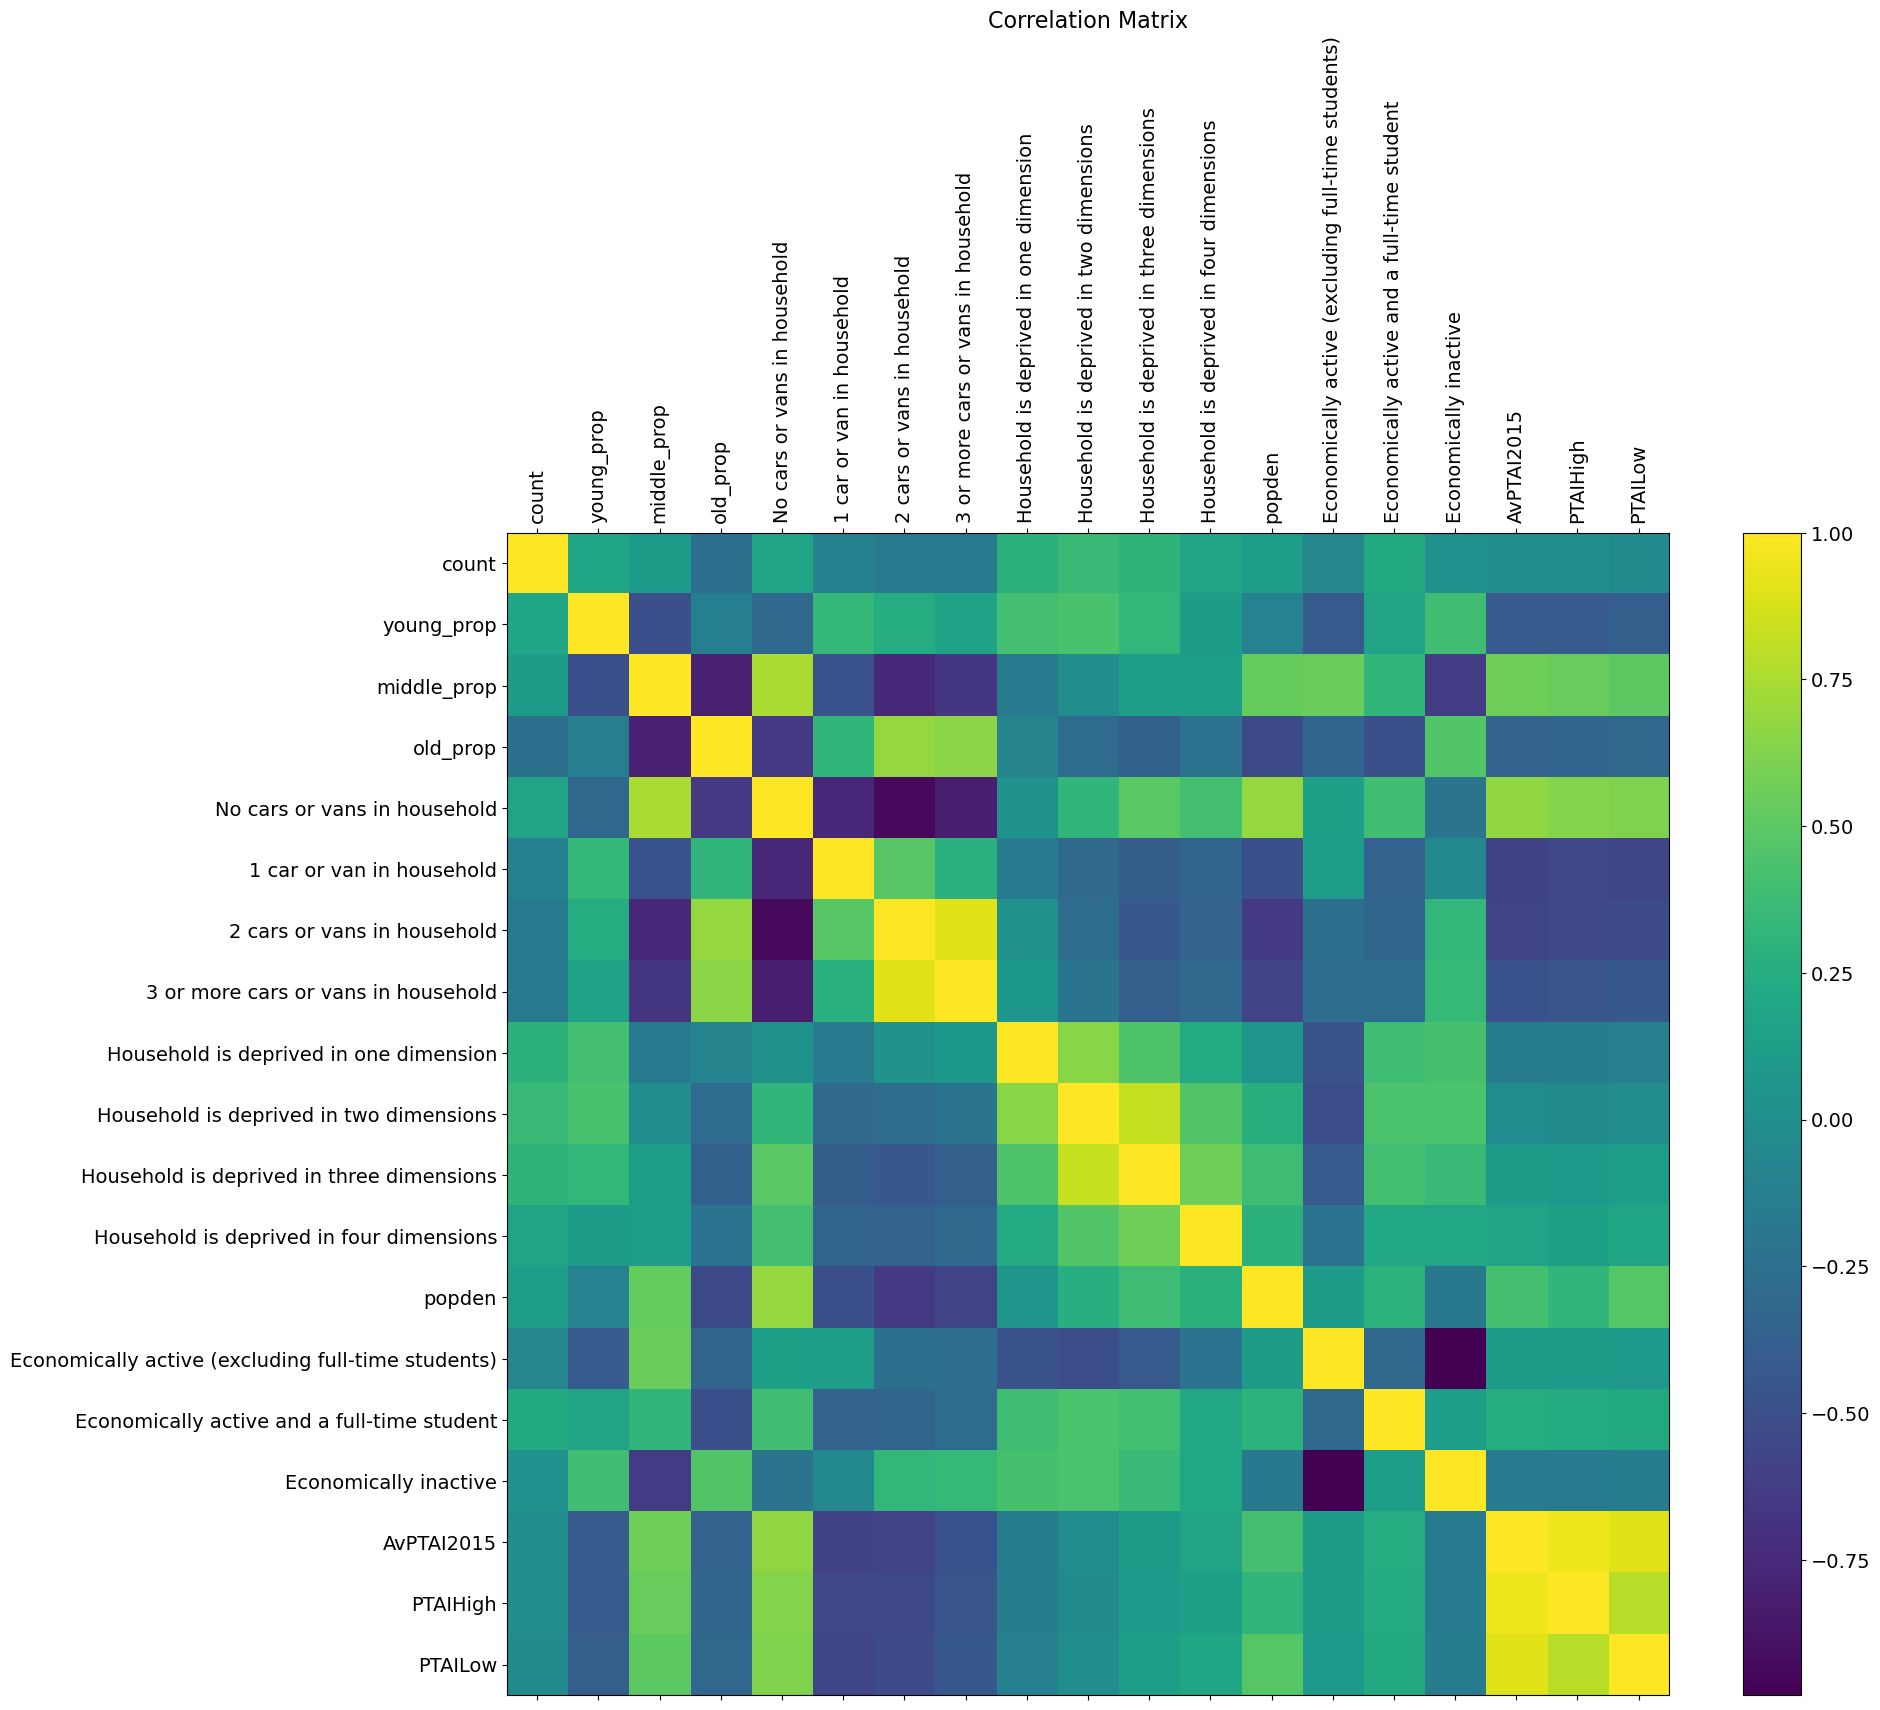

In [137]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)